In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt

In [66]:
wine = pd.read_csv("./winequality-red.csv", sep=';')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [67]:
predictors = wine.loc[:, wine.columns != 'quality']
labels = wine['quality'] > wine['quality'].mean()
catlabels = tf.keras.utils.to_categorical(labels)
# false, true (bad wine, good wine)

In [154]:
# build the model
model = Sequential([
    Dense(12, activation='relu'),
    Dense(12, activation='sigmoid'),
    Dense(6, activation='sigmoid'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, catlabels)
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=500,
    validation_split=0.2,
)

Epoch 1/500
15/15 [==============================] - 2s 59ms/step - loss: 0.7540 - categorical_accuracy: 0.5328 - val_loss: 0.7470 - val_categorical_accuracy: 0.5125
Epoch 2/500
15/15 [==============================] - 0s 7ms/step - loss: 0.7164 - categorical_accuracy: 0.5328 - val_loss: 0.7192 - val_categorical_accuracy: 0.5125
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 0.7003 - categorical_accuracy: 0.5328 - val_loss: 0.7066 - val_categorical_accuracy: 0.5125
Epoch 4/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6923 - categorical_accuracy: 0.5328 - val_loss: 0.6992 - val_categorical_accuracy: 0.5125
Epoch 5/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6876 - categorical_accuracy: 0.5328 - val_loss: 0.6945 - val_categorical_accuracy: 0.5125
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6845 - categorical_accuracy: 0.5328 - val_loss: 0.6910 - val_categorical_accuracy: 0.5125
Epoch 7/5

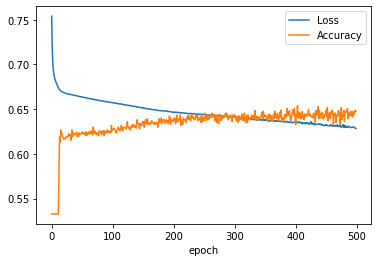

In [156]:
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'])
sns.lineplot(x=range(len(history.history['categorical_accuracy'])), y=history.history['categorical_accuracy'])
plt.xlabel("epoch")
plt.legend(["Loss", "Accuracy"])

In [157]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)

print("Loss on test set:", test_loss)
print("Accuracy on test set:", test_acc)

4/4 [==============================] - 0s 2ms/step - loss: 0.6292 - categorical_accuracy: 0.6425
Loss on test set: 0.6291632652282715
Accuracy on test set: 0.6424999833106995
